Finding patterns in accounts
Attached is an account log of accounts created on a single day. The log is in CSV format. It has the following fields:

created_at, the time the account was created
account, the account login name
name, the human readable name of the account holder
location, the human readable location of the account, as given by the account holder
email, the email address of the account holder
ip_address, the IP address used to create the account
Note: This is a synthetic dataset, created partially from the Google public dataset of GitHub users. Please limit your analysis to the data provided here and do not attempt to enrich it with external data sources. Any real GitHub accounts included here were randomly selected.

It is believed that there have been several campaigns running. A campaign, for our purposes, is the mass creation of accounts to be controlled by a single actor, or small group of actors. We suspect, given recent history, that there are between one and five campaigns.

Your job is to add two columns to this log:

malicious_account, true if you believe it is a malicious account, false if you don't have enough reason to believe it is malicious.
campaign, none if malicious_account is false, otherwise, a unique campaign name, that you will create.
Look for patterns in the data for mass activity, noting that not all mass activity is malicious (for example, a company could be creating accounts for their programmers).

Also, for each campaign, describe, in as detailed a manner as possible, what the pattern you notice. If you like, you can describe these in code, using a programming language like Ruby or Python.

Also, assuming that we are holding back the "true" labels for these accounts, what are some metrics we could run to determine how well you did?

To summarize:

Add two columns to the attached file, as described above.
For each campaign, describe the patterns you can use to detect the malicious accounts
Describe metrics that could be used to determine how well you did in step (2).
Please spend no more than 4 hours on this exercise. If you want to describe what you would do next, feel free to do so.



### Reading Data

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Data
gthub = pd.read_csv('account_log_without_labels.csv')


In [4]:
# Displying Data  (itemized sales)
gthub.head(400)

,created_at,account,name,location,email,ip_address
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231
...,...,...,...,...,...,...
395,2021-11-12 02:52:27 UTC,amardeshbd,Hossain Khan,Canada,contact@hossainkhan.info,199.50.103.78
396,2021-11-12 02:53:11 UTC,arruda,Felipe Arruda Pontes,Brazil,contato@arruda.blog.br,15.144.234.244
397,2021-11-12 02:54:08 UTC,binarytales,Jon Linklater-Johnson,"Brighton, England",jon@binarytal.es,248.222.2.131
398,2021-11-12 02:54:22 UTC,jandantes,Jan Dantes,"Makati, Philippines",jandantes@hotmail.com,182.218.181.174


In [5]:
print(gthub.shape)
print(gthub.columns)
columns2 = gthub.columns.tolist()


(3844, 6)
Index(['created_at', 'account', 'name', 'location', 'email', 'ip_address'], dtype='object')


In [6]:
gthub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  3844 non-null   object
 1   account     3844 non-null   object
 2   name        3788 non-null   object
 3   location    3178 non-null   object
 4   email       3844 non-null   object
 5   ip_address  3826 non-null   object
dtypes: object(6)
memory usage: 180.3+ KB


### Detecting Malicious Accounts

What has been done
1 - Check if an email is valid. Note that, some spammy accounts validates their email. 
2 - Check if an IP is not NULL. The system might be down because the last IP accounts were all NULL.
3 - Check if an IP is duplicated. Some people will creat two accounts from the same device ( work and priavt account) therfore, it is not an accourate indication and it needs further investigation based on other rules. 
4 - Check if there is matching between account name, person name, and email name (for account farming). Here, we need further investigation because hammy accounts also seeks this pattern. 
5 - Check if an IP have small interval between the accounts.
6 - Check if email is sub domain. As a sub domain, it could be from a university or a free provider. If it is a pre hosting provider then their is a possibility of a spammy account and further investigation is needed.  
7 - Check if location is valid (automated).
8 - Check if IP and Location match. Extracting the country succecfully to do this manually.
9 - I tried two times to integrate unsupervised Machine Learning (ML) techniques for clustering (AgglomerativeClustering). First to cluster the datset into two groups (spam and ham). Second to cluster the spammy accounts to five campaigns. The model is not optimal and need further development and the results may differ from the manual results because models rely on a combination of rules.  

What has not been done
1 - Check if IP and Location match (future work if we want to have it done automated) becase the srvers are down multiple times I tried and the data is incomplete. 

#### Validating Email addresses

In [7]:
! pip install validate_email

In [8]:
from validate_email import validate_email
gthub['is_valid_email'] = gthub['email'].apply(lambda x:validate_email(x))                                                                              
gthub.head()

,created_at,account,name,location,email,ip_address,is_valid_email
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56,True
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81,True
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231,True


In [9]:
gthub['is_valid_email'].value_counts()

True     3787
False      57
Name: is_valid_email, dtype: int64

In [10]:
gthub[gthub['is_valid_email'] == False].head()

,created_at,account,name,location,email,ip_address,is_valid_email
29,2021-11-12 00:14:47 UTC,puppetMaster3,Vic C,SOMA SF,vicmcvc (at) gmx.com or puppetMaster3 on twitter,233.209.136.149,False
71,2021-11-12 00:36:29 UTC,twogood,David Eriksson,"Ronneby, Sweden",david at any of my domain names,31.66.71.165,False
74,2021-11-12 00:38:04 UTC,felideon,Felipe Delgado,"Ft. Lauderdale, Florida",(reverse '(com gmail @ felideon)),235.217.241.195,False
142,2021-11-12 01:11:22 UTC,NV,Nikita Vasilyev,"Moscow, Russia",base64:cm90MTM6enJAcnlpMWYuZWgK,72.108.160.46,False
346,2021-11-12 02:32:30 UTC,icen,icen,NaN,sam,250.45.37.67,False


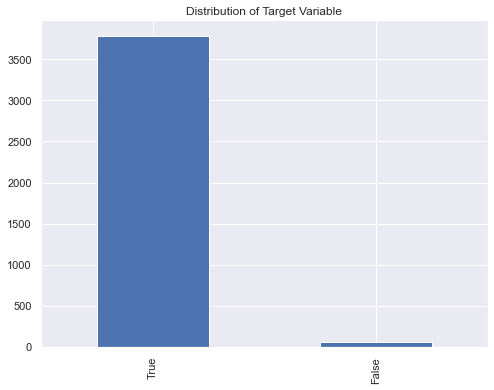

In [11]:
(gthub['is_valid_email'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()

#### IP Address

In [12]:
gthub['is_ip_missing'] = gthub['ip_address'].isnull()  
gthub['is_ip_missing'].value_counts()

False    3826
True       18
Name: is_ip_missing, dtype: int64

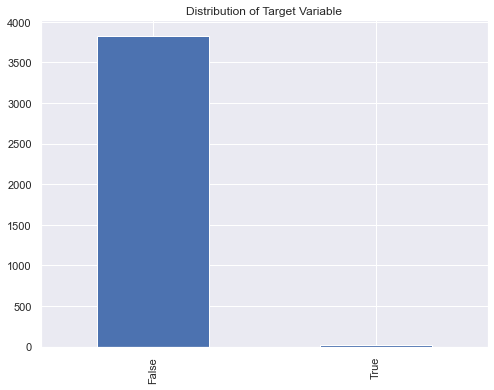

In [13]:
(gthub['is_ip_missing'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()

57 Email addresses are invalid. We can now create "malicious_account" colum with value of "True" if the email is invalid, otherwise the value is "False". I prefer using the phrase suspecious_account here.  

Also 18 enteries have a missing IP-Address.

#### IP Address and Location Match
1 - Find records with same IP Address
2 - Check if the locations are the same

In [14]:
gthub["ip_count"] = gthub.groupby("ip_address")["ip_address"].transform('count')
gthub["location_count"] = gthub.groupby("location")["location"].transform('count')

In [15]:
gthub[gthub['ip_address']=="24.176.0.93"]

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count
1471,2021-11-12 10:01:00 UTC,ardythportia,Ardyth Portia,"Manchester, United Kingdom",ArdythPortia@mailinator.com,24.176.0.93,True,False,100.0,101.0
1476,2021-11-12 10:03:18 UTC,camalahenrie,Camala Henrie,"Manchester, United Kingdom",CamalaHenrie@mailinator.com,24.176.0.93,True,False,100.0,101.0
1482,2021-11-12 10:05:53 UTC,quentincollette,Quentin Collette,"Manchester, United Kingdom",QuentinCollette@mailinator.com,24.176.0.93,True,False,100.0,101.0
1491,2021-11-12 10:08:21 UTC,deanehannie,Deane Hannie,"Manchester, United Kingdom",DeaneHannie@mailinator.com,24.176.0.93,True,False,100.0,101.0
1499,2021-11-12 10:10:50 UTC,verieemax,Veriee Max,"Manchester, United Kingdom",VerieeMax@mailinator.com,24.176.0.93,True,False,100.0,101.0
...,...,...,...,...,...,...,...,...,...,...
2304,2021-11-12 13:50:02 UTC,christalcasey,Christal Casey,"Manchester, United Kingdom",ChristalCasey@mailinator.com,24.176.0.93,True,False,100.0,101.0
2313,2021-11-12 13:52:15 UTC,gerdaamberly,Gerda Amberly,"Manchester, United Kingdom",GerdaAmberly@mailinator.com,24.176.0.93,True,False,100.0,101.0
2320,2021-11-12 13:54:15 UTC,drelianna,Dre Lianna,"Manchester, United Kingdom",DreLianna@mailinator.com,24.176.0.93,True,False,100.0,101.0
2328,2021-11-12 13:57:00 UTC,dellarosanna,Della Rosanna,"Manchester, United Kingdom",DellaRosanna@mailinator.com,24.176.0.93,True,False,100.0,101.0


In [16]:
#Extracting the email name 
email_name = list()
sub_domain = list()
for i in gthub['email']:
    if '@' in i:
        split_at = i.split('@')
        email_name.append(split_at[0])
        split_dot = split_at[1].split('.')
        if len(split_dot) > 2:
              sub_domain.append(1)
        else : 
            sub_domain.append(0)
    else:
        email_name.append(None)
        sub_domain.append(0)
        


In [17]:
np.mean(sub_domain)
# 5% of the accounts are sub domains
gthub['sub_domain'] = sub_domain

In [18]:

#Name, account and email matching (Score extraction)    
names = gthub['name'].astype('str')
accounts = gthub['account'] .astype('str')
email = gthub['email'].astype('str')
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def matching_scorer (x,y):
    ratios = list() 
    for i,k in zip(x, y):
        if i is not None and k is not None:
            ratio = fuzz.token_sort_ratio(i,k)
            ratios.append(ratio)
        else :
            ratios.append(0)
    return ratios


Name_acc_score = matching_scorer(names,accounts)
name_email_score = matching_scorer(names,email_name)
Acc_email_score = matching_scorer(accounts,email_name)

gthub['Name_acc_score'] = Name_acc_score
gthub['name_email_score'] = name_email_score
gthub['Acc_email_score'] = Acc_email_score


In [19]:
gthub.head()

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,1,70,70,100
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56,True,False,1.0,4.0,0,20,33,60
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81,True,False,1.0,4.0,0,24,43,22
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True,False,1.0,1.0,0,56,48,53
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231,True,False,1.0,1.0,0,21,11,0


In [32]:
def percent (column,perc):
    n_e_m = list()
    for i in gthub[column]:
        if i > perc:
            n_e_m.append(1)
        else:
            n_e_m.append(0)
    return n_e_m

In [33]:
np.mean(percent('name_email_score',70))
#39% of the data have matched person name and email name above 70%

0.39724245577523415

In [34]:
np.mean(percent('name_email_score',95))
# 18% with matched name and account worth a flag to be sus

0.1805411030176899

In [35]:
np.mean(percent('Name_acc_score',70))
# 24% were matched person name and account name above 70%

0.2442767950052029

In [36]:
np.mean(percent('Name_acc_score',95))
# 11% with matched name and account worth a flag to be sus

0.11316337148803329

In [37]:
np.mean(percent('Acc_email_score',95))
# 26% with matched name and account worth a flag to be sus

0.2606659729448491

#### Create Malicious Account

In [31]:
#Extracting the Ip Country 

# extracting the country from the IP to be compared with the registered country to determine the usage of VPN
import re
import sys
import socket
import struct
import json
from geopy.geocoders import Nominatim
from global_land_mask import globe
import os
import requests

def getting_ip(row):
    """This function calls the api and return the response"""
    url = f"https://freegeoip.app/json/{row}"       # getting records from getting ip address
    headers = {
        'accept': "application/json",
        'content-type': "application/json"
        }
    response = requests.request("GET", url, headers=headers)
    respond = json.loads(response.text)
    return respond

country = list()
country_code = list()
for i in gthub['ip_address'][:3826]:
    if i != 'No value':
        response = getting_ip(str(i))
        country.append(response.get('country_name'))
        country_code.append(response.get('country_code'))
        
for i in range(18):
    country.append('')
    country_code.append('') 
gthub['country'] = country


In [38]:
gthub.head()

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,country
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,1,70,70,100,
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56,True,False,1.0,4.0,0,20,33,60,United States
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81,True,False,1.0,4.0,0,24,43,22,United States
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True,False,1.0,1.0,0,56,48,53,France
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231,True,False,1.0,1.0,0,21,11,0,


In [39]:
#Creation time investigation
from datetime import datetime
creation_date = list()
for i in gthub['created_at']:
    time = i[:19]
    utc_dt = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S')
    creation_date.append(utc_dt)
gthub['creation_date'] = creation_date

In [40]:
print(creation_date[0])
print(creation_date[1])
print((creation_date[0] - creation_date[1]).total_seconds())


2021-11-12 00:01:00
2021-11-12 00:01:33
-33.0


In [41]:
dup_IP = gthub['ip_address'].value_counts()
dup_IP = dup_IP[dup_IP > 1]
Mean_time_interval = list()
for i in gthub['ip_address']:
    if  i in dup_IP.index:
        IP_Data = gthub[gthub['ip_address'] == i]
        Ip_Time = list(IP_Data['creation_date'].sort_values())
        Mean_time_interval.append( np.mean([(y - x).total_seconds() for x, y in zip(Ip_Time, Ip_Time[1:])]))
        
    else:
        Mean_time_interval.append(99999999)
gthub['interval'] =  Mean_time_interval   


mean interval 19484.182623133052
max interval 63717.0
min interval 62.0


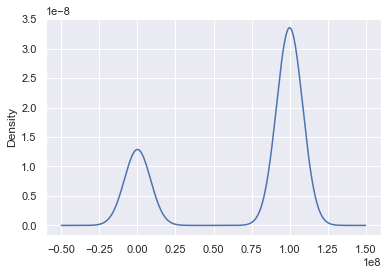

In [42]:
gthub['interval'].plot.kde()
print("mean interval",gthub[gthub['interval'] < 99999998]['interval'].mean())
print("max interval",gthub[gthub['interval'] < 99999998]['interval'].max())
print("min interval",gthub[gthub['interval'] < 99999998]['interval'].min())

In [43]:
print(gthub[gthub['interval'] < 360]['interval'].count())

143


In [44]:
gthub[gthub['ip_address'] == '24.176.0.93']

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval
1471,2021-11-12 10:01:00 UTC,ardythportia,Ardyth Portia,"Manchester, United Kingdom",ArdythPortia@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,96,96,100,United States,2021-11-12 10:01:00,144.535354
1476,2021-11-12 10:03:18 UTC,camalahenrie,Camala Henrie,"Manchester, United Kingdom",CamalaHenrie@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,96,96,100,United States,2021-11-12 10:03:18,144.535354
1482,2021-11-12 10:05:53 UTC,quentincollette,Quentin Collette,"Manchester, United Kingdom",QuentinCollette@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,52,52,100,United States,2021-11-12 10:05:53,144.535354
1491,2021-11-12 10:08:21 UTC,deanehannie,Deane Hannie,"Manchester, United Kingdom",DeaneHannie@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,96,96,100,United States,2021-11-12 10:08:21,144.535354
1499,2021-11-12 10:10:50 UTC,verieemax,Veriee Max,"Manchester, United Kingdom",VerieeMax@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,63,63,100,United States,2021-11-12 10:10:50,144.535354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,2021-11-12 13:50:02 UTC,christalcasey,Christal Casey,"Manchester, United Kingdom",ChristalCasey@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,59,59,100,United States,2021-11-12 13:50:02,144.535354
2313,2021-11-12 13:52:15 UTC,gerdaamberly,Gerda Amberly,"Manchester, United Kingdom",GerdaAmberly@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,56,56,100,United States,2021-11-12 13:52:15,144.535354
2320,2021-11-12 13:54:15 UTC,drelianna,Dre Lianna,"Manchester, United Kingdom",DreLianna@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,95,95,100,United States,2021-11-12 13:54:15,144.535354
2328,2021-11-12 13:57:00 UTC,dellarosanna,Della Rosanna,"Manchester, United Kingdom",DellaRosanna@mailinator.com,24.176.0.93,True,False,100.0,101.0,0,96,96,100,United States,2021-11-12 13:57:00,144.535354


In [45]:

#converting the UTC time to local time zone based on th e ip country extracted from it
import dateutil
import pytz
from pytz import country_timezones

timezone_country = {}
for countrycode in country_timezones:
    timezones = country_timezones[countrycode]
    for timezone in timezones:
        timezone_country[timezone] = countrycode

code_to_zone = list()
for i in country_code:
    keys = [zone for zone in timezone_country.keys() if i in timezone_country[zone]]
    code_to_zone.append(keys[0])



local_creation_time = list()
for i,k in zip (code_to_zone,creation_date):
    if i !='':
        dt = dateutil.parser.parse(str(k))
        local_creation_time.append(pytz.timezone(i).fromutc(dt))
    else:
        local_creation_time.append(0)
gthub['local_creation_time'] = local_creation_time

In [46]:
gthub.head(100)

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,1,70,70,100,,2021-11-12 00:01:00,99999999.0,2021-11-12 01:01:00+01:00
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56,True,False,1.0,4.0,0,20,33,60,United States,2021-11-12 00:01:33,99999999.0,2021-11-11 19:01:33-05:00
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81,True,False,1.0,4.0,0,24,43,22,United States,2021-11-12 00:01:49,99999999.0,2021-11-11 19:01:49-05:00
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True,False,1.0,1.0,0,56,48,53,France,2021-11-12 00:02:09,99999999.0,2021-11-12 01:02:09+01:00
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231,True,False,1.0,1.0,0,21,11,0,,2021-11-12 00:02:46,99999999.0,2021-11-12 01:02:46+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-11-12 00:48:25 UTC,jimrhoskins,Jim Hoskins,"Orlando, FL",jim@jimhoskins.com,70.114.244.47,True,False,1.0,5.0,0,64,43,43,United States,2021-11-12 00:48:25,99999999.0,2021-11-11 19:48:25-05:00
96,2021-11-12 00:48:59 UTC,peixuan,Zhang Peixuan,"Changchun, Jilin, China",zhangpeixuan.cn@gmail.com,63.132.26.157,True,False,1.0,1.0,0,70,50,64,United States,2021-11-12 00:48:59,99999999.0,2021-11-11 19:48:59-05:00
97,2021-11-12 00:49:31 UTC,ulmangt,Geoffrey Ulman,"Reston, VA",ulman@metsci.com,57.78.83.36,True,False,1.0,3.0,0,48,53,83,Italy,2021-11-12 00:49:31,99999999.0,2021-11-12 01:49:31+01:00
98,2021-11-12 00:50:03 UTC,hoquangthaiholy,Hồ Quang Thái,Cần Thơ,hoquangthaiholy@gmail.com,5.121.184.26,True,False,2.0,1.0,0,67,67,100,Iran,2021-11-12 00:50:03,42874.0,2021-11-12 04:20:03+03:30


In [47]:
location = list(gthub['location'])
location_validation = list()
for  i in location:
    spaces_count = str(i).count(' ')
    comma_count = str(i).count(',')
    if spaces_count > 2:
        if spaces_count > comma_count:
            location_validation.append(0)
        else:
            location_validation.append(1)
    else: 
        location_validation.append(1)
gthub['Valid_location']= location_validation
location_validation.count(0)

111

In [48]:
# create a list of our conditions
conditions = [
    (gthub["is_ip_missing"] == True) | (gthub['is_valid_email'] == False)|(gthub['Valid_location'] == 0),
    (gthub["ip_count"] == 2) & (gthub['location_count'] >=1),
    (gthub["name_email_score"] >= 95) & (gthub['Name_acc_score'] >=95) & (gthub['Acc_email_score'] >=95),
    (gthub['sub_domain'] == 1) | (gthub['interval'] < 360)]

# create a list of the values we want to assign for each condition
values = [True, True,True,True]

# create a new column and use np.select to assign values to it using our lists as arguments
gthub['malicious_account'] = np.select(conditions, values)

gthub[gthub['malicious_account']==1]
    
    
    
#gthub['malicious_account'] = np.where(gthub['malicious_account']  == 1 , True, False) 


# display updated DataFrame
#gthub.head(100)

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time,Valid_location,malicious_account
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,1,70,70,100,,2021-11-12 00:01:00,99999999.0,2021-11-12 01:01:00+01:00,1,1
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True,False,1.0,1.0,0,56,48,53,France,2021-11-12 00:02:09,99999999.0,2021-11-12 01:02:09+01:00,0,1
15,2021-11-12 00:07:21 UTC,st-luke,Lucas Arduini,New York,luke.arduini@me.com,223.16.28.78,True,False,2.0,8.0,0,30,80,42,Hong Kong,2021-11-12 00:07:21,50224.0,2021-11-12 08:07:21+08:00,1,1
18,2021-11-12 00:08:47 UTC,dskeba,Derek Skeba,"Grand Rapids, MI, USA",derek@mediavim.com,181.208.32.68,True,False,1.0,2.0,0,71,62,36,Venezuela,2021-11-12 00:08:47,99999999.0,2021-11-11 20:08:47-04:00,0,1
25,2021-11-12 00:12:00 UTC,gitt,Mike Kelley,"Ennis, MT",mike@codezombie.org,82.218.83.126,True,False,2.0,1.0,0,13,53,25,Austria,2021-11-12 00:12:00,63180.0,2021-11-12 01:12:00+01:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,2021-11-12 23:26:50 UTC,zishon89us,Zeeshan Hassan,"Karachi, Pakistan",http://facebook.com/shan89pk,NaN,False,True,NaN,1.0,0,33,0,0,,2021-11-12 23:26:50,99999999.0,2021-11-13 00:26:50+01:00,1,1
3840,2021-11-12 23:27:26 UTC,ironpinguin,Michele Catalano,"Munich, Germany",michele@catalano.de,NaN,True,True,NaN,3.0,0,15,61,11,,2021-11-12 23:27:26,99999999.0,2021-11-13 00:27:26+01:00,1,1
3841,2021-11-12 23:27:54 UTC,jpmartinezv,Jason,NaN,jason1994.8@gmail.com,NaN,True,True,NaN,NaN,0,38,62,27,,2021-11-12 23:27:54,99999999.0,2021-11-13 00:27:54+01:00,1,1
3842,2021-11-12 23:28:26 UTC,aquette,Arnaud Quette,NaN,arnaud.quette@free.fr,NaN,True,True,NaN,NaN,0,70,100,70,,2021-11-12 23:28:26,99999999.0,2021-11-13 00:28:26+01:00,1,1


In [49]:
gthub['malicious_account'].value_counts()

0    2459
1    1385
Name: malicious_account, dtype: int64

In [50]:
campaigns = list()
for index, row in gthub.iterrows():
    if (row["is_ip_missing"] == True) | (row['is_valid_email'] == False):
         campaigns.append('missing_values')
    elif (row["ip_count"] == 2) & (row['location_count'] >=1):
        campaigns.append('many records')
    elif (row["name_email_score"] >= 95) & (row['Name_acc_score'] >=95) & (row['Acc_email_score'] >=95):
         campaigns.append('matching bot')
    elif (row['sub_domain'] == 1) :
        campaigns.append('sub domain')
    elif (row['interval'] < 360):
        campaigns.append('bot interval')
    else:
        campaigns.append('none')


In [51]:
campaigns

['sub domain',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'many records',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'many records',
 'many records',
 'none',
 'many records',
 'missing_values',
 'none',
 'none',
 'many records',
 'many records',
 'many records',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'matching bot',
 'many records',
 'none',
 'none',
 'none',
 'matching bot',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'many records',
 'many records',
 'none',
 'none',
 'none',
 'none',
 'none',
 'matching bot',
 'none',
 'missing_values',
 'none',
 'none',
 'missing_values',
 'none',
 'none',
 'sub domain',
 'many records',
 'none',
 'many records',
 'none',
 'none',
 'none',
 'sub domain',
 'none',
 'none',
 'many records',
 'none',
 'none',
 'none',
 'non

In [52]:
gthub['campaigns'] = campaigns

In [53]:
gthub.head(20)

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,...,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time,Valid_location,malicious_account,campaigns
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,...,70,70,100,,2021-11-12 00:01:00,99999999.0,2021-11-12 01:01:00+01:00,1,1,sub domain
1,2021-11-12 00:01:33 UTC,vdh,Tim van der Horst,"Brisbane, Australia",timgvdh@gmail.com,159.234.174.56,True,False,1.0,4.0,...,20,33,60,United States,2021-11-12 00:01:33,99999999.0,2021-11-11 19:01:33-05:00,1,0,none
2,2021-11-12 00:01:49 UTC,notch8,Rob Kaufman,"San Diego, CA",rob@notch8.com,166.180.175.81,True,False,1.0,4.0,...,24,43,22,United States,2021-11-12 00:01:49,99999999.0,2021-11-11 19:01:49-05:00,1,0,none
3,2021-11-12 00:02:09 UTC,vladi-miranda,Jose Miranda,"San Salvador, El Salvador",vladimiranda_albo@hotmail.com,83.155.216.59,True,False,1.0,1.0,...,56,48,53,France,2021-11-12 00:02:09,99999999.0,2021-11-12 01:02:09+01:00,0,1,none
4,2021-11-12 00:02:46 UTC,linuxjuggler,mhd zaher ghaibeh,"Damascus , Syria",z@zah.me,231.64.71.231,True,False,1.0,1.0,...,21,11,0,,2021-11-12 00:02:46,99999999.0,2021-11-12 01:02:46+01:00,1,0,none
5,2021-11-12 00:03:03 UTC,loopingrage,Jose de Castro,"Orlando, FL",loopingrage@gmail.com,140.15.153.63,True,False,1.0,5.0,...,16,16,100,United States,2021-11-12 00:03:03,99999999.0,2021-11-11 19:03:03-05:00,1,0,none
6,2021-11-12 00:03:23 UTC,labeltop,Hasan,"Portland, Maine, USA",labeltop@gmail.com,201.225.220.101,True,False,1.0,1.0,...,15,15,100,Panama,2021-11-12 00:03:23,99999999.0,2021-11-11 19:03:23-05:00,1,0,none
7,2021-11-12 00:03:56 UTC,lisa,Lisa Seelye,"Toronto, Canada",lisa@thedoh.com,46.208.52.118,True,False,1.0,6.0,...,53,53,100,United Kingdom,2021-11-12 00:03:56,99999999.0,2021-11-12 00:03:56+00:00,1,0,none
8,2021-11-12 00:04:24 UTC,MattMcComb,Matthew McComb,Northern Ireland,mattmccomb@gmail.com,150.111.6.193,True,False,1.0,1.0,...,83,83,100,United States,2021-11-12 00:04:24,99999999.0,2021-11-11 19:04:24-05:00,1,0,none
9,2021-11-12 00:04:52 UTC,wanpinglee,Wan-Ping,Boston,wanping.lee@gmail.com,10.253.50.176,True,False,1.0,4.0,...,44,42,67,,2021-11-12 00:04:52,99999999.0,2021-11-12 01:04:52+01:00,1,0,none


#### Manual Test

In [54]:
gthub[gthub['location']== 'Australia'] 

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,...,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time,Valid_location,malicious_account,campaigns
0,2021-11-12 00:01:00 UTC,msellers,Matthew Sellers,Australia,msellers@msellers.id.au,250.48.45.253,True,False,1.0,8.0,...,70,70,100,,2021-11-12 00:01:00,99999999.0,2021-11-12 01:01:00+01:00,1,1,sub domain
295,2021-11-12 02:12:57 UTC,sat,Sandy,Australia,sandy@whagoo.com.au,40.253.22.10,True,False,1.0,8.0,...,50,100,50,United States,2021-11-12 02:12:57,99999999.0,2021-11-11 21:12:57-05:00,1,1,sub domain
570,2021-11-12 04:03:52 UTC,stemmo,Steve,Australia,strang@dmail.com,100.92.141.87,True,False,1.0,8.0,...,55,36,33,,2021-11-12 04:03:52,99999999.0,2021-11-12 05:03:52+01:00,1,0,none
691,2021-11-12 04:51:57 UTC,signified,Signified,Australia,robert.love@signified.com.au,131.228.21.191,True,False,1.0,8.0,...,100,10,10,Finland,2021-11-12 04:51:57,99999999.0,2021-11-12 06:51:57+02:00,1,1,sub domain
1108,2021-11-12 07:37:52 UTC,curiousdannii,Dannii Willis,Australia,curiousdannii@gmail.com,18.229.39.15,True,False,1.0,8.0,...,46,46,100,Brazil,2021-11-12 07:37:52,99999999.0,2021-11-12 05:37:52-02:00,1,0,none
1707,2021-11-12 11:06:11 UTC,dkarzon,Damian Karzon,Australia,dkarzon@tboda.com,194.227.222.43,True,False,2.0,8.0,...,70,70,100,United Kingdom,2021-11-12 11:06:11,14190.0,2021-11-12 11:06:11+00:00,1,1,many records
3544,2021-11-12 21:05:30 UTC,BrettJay,Brett Jones,Australia,hello@brettjones.me,196.28.61.108,True,False,2.0,8.0,...,63,25,15,Puerto Rico,2021-11-12 21:05:30,21373.0,2021-11-12 17:05:30-04:00,1,1,many records
3720,2021-11-12 22:27:31 UTC,mackron,David Reid,Australia,davidreid@galicktech.com.au,127.162.17.42,True,False,1.0,8.0,...,24,95,25,,2021-11-12 22:27:31,99999999.0,2021-11-12 23:27:31+01:00,1,1,sub domain


In [79]:
gthub[gthub['ip_address']== '194.227.222.43'] 

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,...,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time,Valid_location,malicious_account,campaigns
1707,2021-11-12 11:06:11 UTC,dkarzon,Damian Karzon,Australia,dkarzon@tboda.com,194.227.222.43,True,False,2.0,8.0,...,70,70,100,United Kingdom,2021-11-12 11:06:11,14190.0,2021-11-12 11:06:11+00:00,1,1,many records
2547,2021-11-12 15:02:41 UTC,beautifulbutterfly410,Elif Köybaşı,"Niğde, Turkey",elif.koybasi@gmail.com,194.227.222.43,True,False,2.0,5.0,...,25,78,24,United Kingdom,2021-11-12 15:02:41,14190.0,2021-11-12 15:02:41+00:00,1,1,many records


In [80]:
gthub[gthub['location']== 'Niğde, Turkey'] 

,created_at,account,name,location,email,ip_address,is_valid_email,is_ip_missing,ip_count,location_count,...,Name_acc_score,name_email_score,Acc_email_score,country,creation_date,interval,local_creation_time,Valid_location,malicious_account,campaigns
2125,2021-11-12 13:01:36 UTC,crazyelephant917,Kaya Tüzün,"Niğde, Turkey",kaya.tuzun@gmail.com,4.154.245.177,True,False,2.0,5.0,...,33,89,23,United States,2021-11-12 13:01:36,26374.0,2021-11-12 08:01:36-05:00,1,1,many records
2327,2021-11-12 13:56:32 UTC,orangezebra794,Gonca Mertoğlu,"Niğde, Turkey",gonca.mertoglu@jacobwg.com,174.49.79.193,True,False,2.0,5.0,...,14,93,21,United States,2021-11-12 13:56:32,42845.0,2021-11-12 08:56:32-05:00,1,1,many records
2414,2021-11-12 14:23:28 UTC,sadladybug199,Ege Çamdalı,"Niğde, Turkey",ege.camdali@gmail.com,25.99.223.44,True,False,2.0,5.0,...,35,86,33,United Kingdom,2021-11-12 14:23:28,789.0,2021-11-12 14:23:28+00:00,1,1,many records
2547,2021-11-12 15:02:41 UTC,beautifulbutterfly410,Elif Köybaşı,"Niğde, Turkey",elif.koybasi@gmail.com,194.227.222.43,True,False,2.0,5.0,...,25,78,24,United Kingdom,2021-11-12 15:02:41,14190.0,2021-11-12 15:02:41+00:00,1,1,many records
2978,2021-11-12 17:15:47 UTC,ticklishbear746,Davut Kahveci,"Niğde, Turkey",davut.kahveci@gmail.com,34.95.119.215,True,False,2.0,5.0,...,7,100,14,United States,2021-11-12 17:15:47,32871.0,2021-11-12 12:15:47-05:00,1,1,many records


# Unsupervised learning

In [73]:
df.columns

Index(['account', 'name', 'location', 'email', 'ip_address', 'is_valid_email',
       'is_ip_missing', 'ip_count', 'location_count', 'sub_domain',
       'Name_acc_score', 'name_email_score', 'Acc_email_score', 'country',
       'interval', 'Valid_location'],
      dtype='object')

In [89]:
#data prepration for clustering
columns_drop = columns2
df = gthub
df = df.set_index('account')
df = df.drop(['malicious_account','creation_date','campaigns'],axis=1)


In [90]:
print(columns_drop)

['created_at', 'name', 'location', 'email', 'ip_address']


In [91]:
df = df.drop(columns_drop,axis = 1)

In [95]:
df = df.drop('local_creation_time',axis=1)

In [102]:
df.isna().sum()

is_valid_email        0
is_ip_missing         0
ip_count             18
location_count      666
sub_domain            0
Name_acc_score        0
name_email_score      0
Acc_email_score       0
country               0
interval              0
Valid_location        0
dtype: int64

In [103]:
df['ip_count'] = df['ip_count'].fillna(-1)
df['location_count'] = df['location_count'].fillna(-1)


In [104]:
df.isna().sum()

is_valid_email      0
is_ip_missing       0
ip_count            0
location_count      0
sub_domain          0
Name_acc_score      0
name_email_score    0
Acc_email_score     0
country             0
interval            0
Valid_location      0
dtype: int64

In [105]:
one_hot_data = pd.get_dummies(df,columns=['Valid_location','country','is_ip_missing','is_valid_email'])

In [106]:
one_hot_data.head()

,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,interval,Valid_location_0,Valid_location_1,country_,...,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,country_Zambia,is_ip_missing_False,is_ip_missing_True,is_valid_email_False,is_valid_email_True
account,,,,,,,,,,,,,,,,,,,,,
msellers,1.0,8.0,1,70,70,100,99999999.0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
vdh,1.0,4.0,0,20,33,60,99999999.0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
notch8,1.0,4.0,0,24,43,22,99999999.0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
vladi-miranda,1.0,1.0,0,56,48,53,99999999.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
linuxjuggler,1.0,1.0,0,21,11,0,99999999.0,0,1,1,...,0,0,0,0,0,0,1,0,0,1


In [107]:
#Clustering spam and ham phase
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
y_hat_spam_ham = model.fit_predict(one_hot_data)
df['spam_ham'] = y_hat_spam_ham

In [108]:
#getting the spam data
spam_data = df[df['spam_ham'] == 0]
one_hot_spam_data = pd.get_dummies(spam_data)
#Clustering 5 spam comp
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
y_hat_spam = model.fit_predict(one_hot_spam_data)
spam_data['label'] = y_hat_spam

In [109]:
full_index = df.index
spam_index = spam_data.index

spam_comps = list()
for i in full_index:
    if i in spam_index:
        value = spam_data.loc[i,'label']
        spam_comps.append(value)
    else:
        spam_comps.append('none')

In [110]:
df['comps'] = spam_comps

In [111]:
df.head()

,is_valid_email,is_ip_missing,ip_count,location_count,sub_domain,Name_acc_score,name_email_score,Acc_email_score,country,interval,Valid_location,spam_ham,comps
account,,,,,,,,,,,,,
msellers,True,False,1.0,8.0,1,70,70,100,,99999999.0,1,1,none
vdh,True,False,1.0,4.0,0,20,33,60,United States,99999999.0,1,1,none
notch8,True,False,1.0,4.0,0,24,43,22,United States,99999999.0,1,1,none
vladi-miranda,True,False,1.0,1.0,0,56,48,53,France,99999999.0,0,1,none
linuxjuggler,True,False,1.0,1.0,0,21,11,0,,99999999.0,1,1,none


In [114]:
df['comps'].unique()

array(['none', 2, 1, 4, 0, 3], dtype=object)